# Proyek Analisis Data: Bike Sharing Dataset

## Menyiapkan data dan semua library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
hour = "/content/drive/My Drive/Bike-sharing-dataset/hour.csv"
day = "/content/drive/My Drive/Bike-sharing-dataset/day.csv"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Menentukan pertanyaan bisnis

- Pertanyaan 1:
Bagaimana performa jumlah rental bike per bulan pada tahun 2011?
- Pertanyaan 2: Bagaimana pengaruh humidity terhadap jumlah rental bike?

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv(hour, delimiter=",")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
day_df = pd.read_csv(day, delimiter=",")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

- Apakah ada missing value?

In [ ]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Apakah ada data duplikat?

In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
day_df.duplicated().sum()

0

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Dropping missing values

In [ ]:
day_df.dropna(axis=0, inplace=True)

In [ ]:
hour_df.dropna(axis=0, inplace=True)

- Mengganti tipe data `dteday`

In [ ]:
for column in ["dteday"]:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


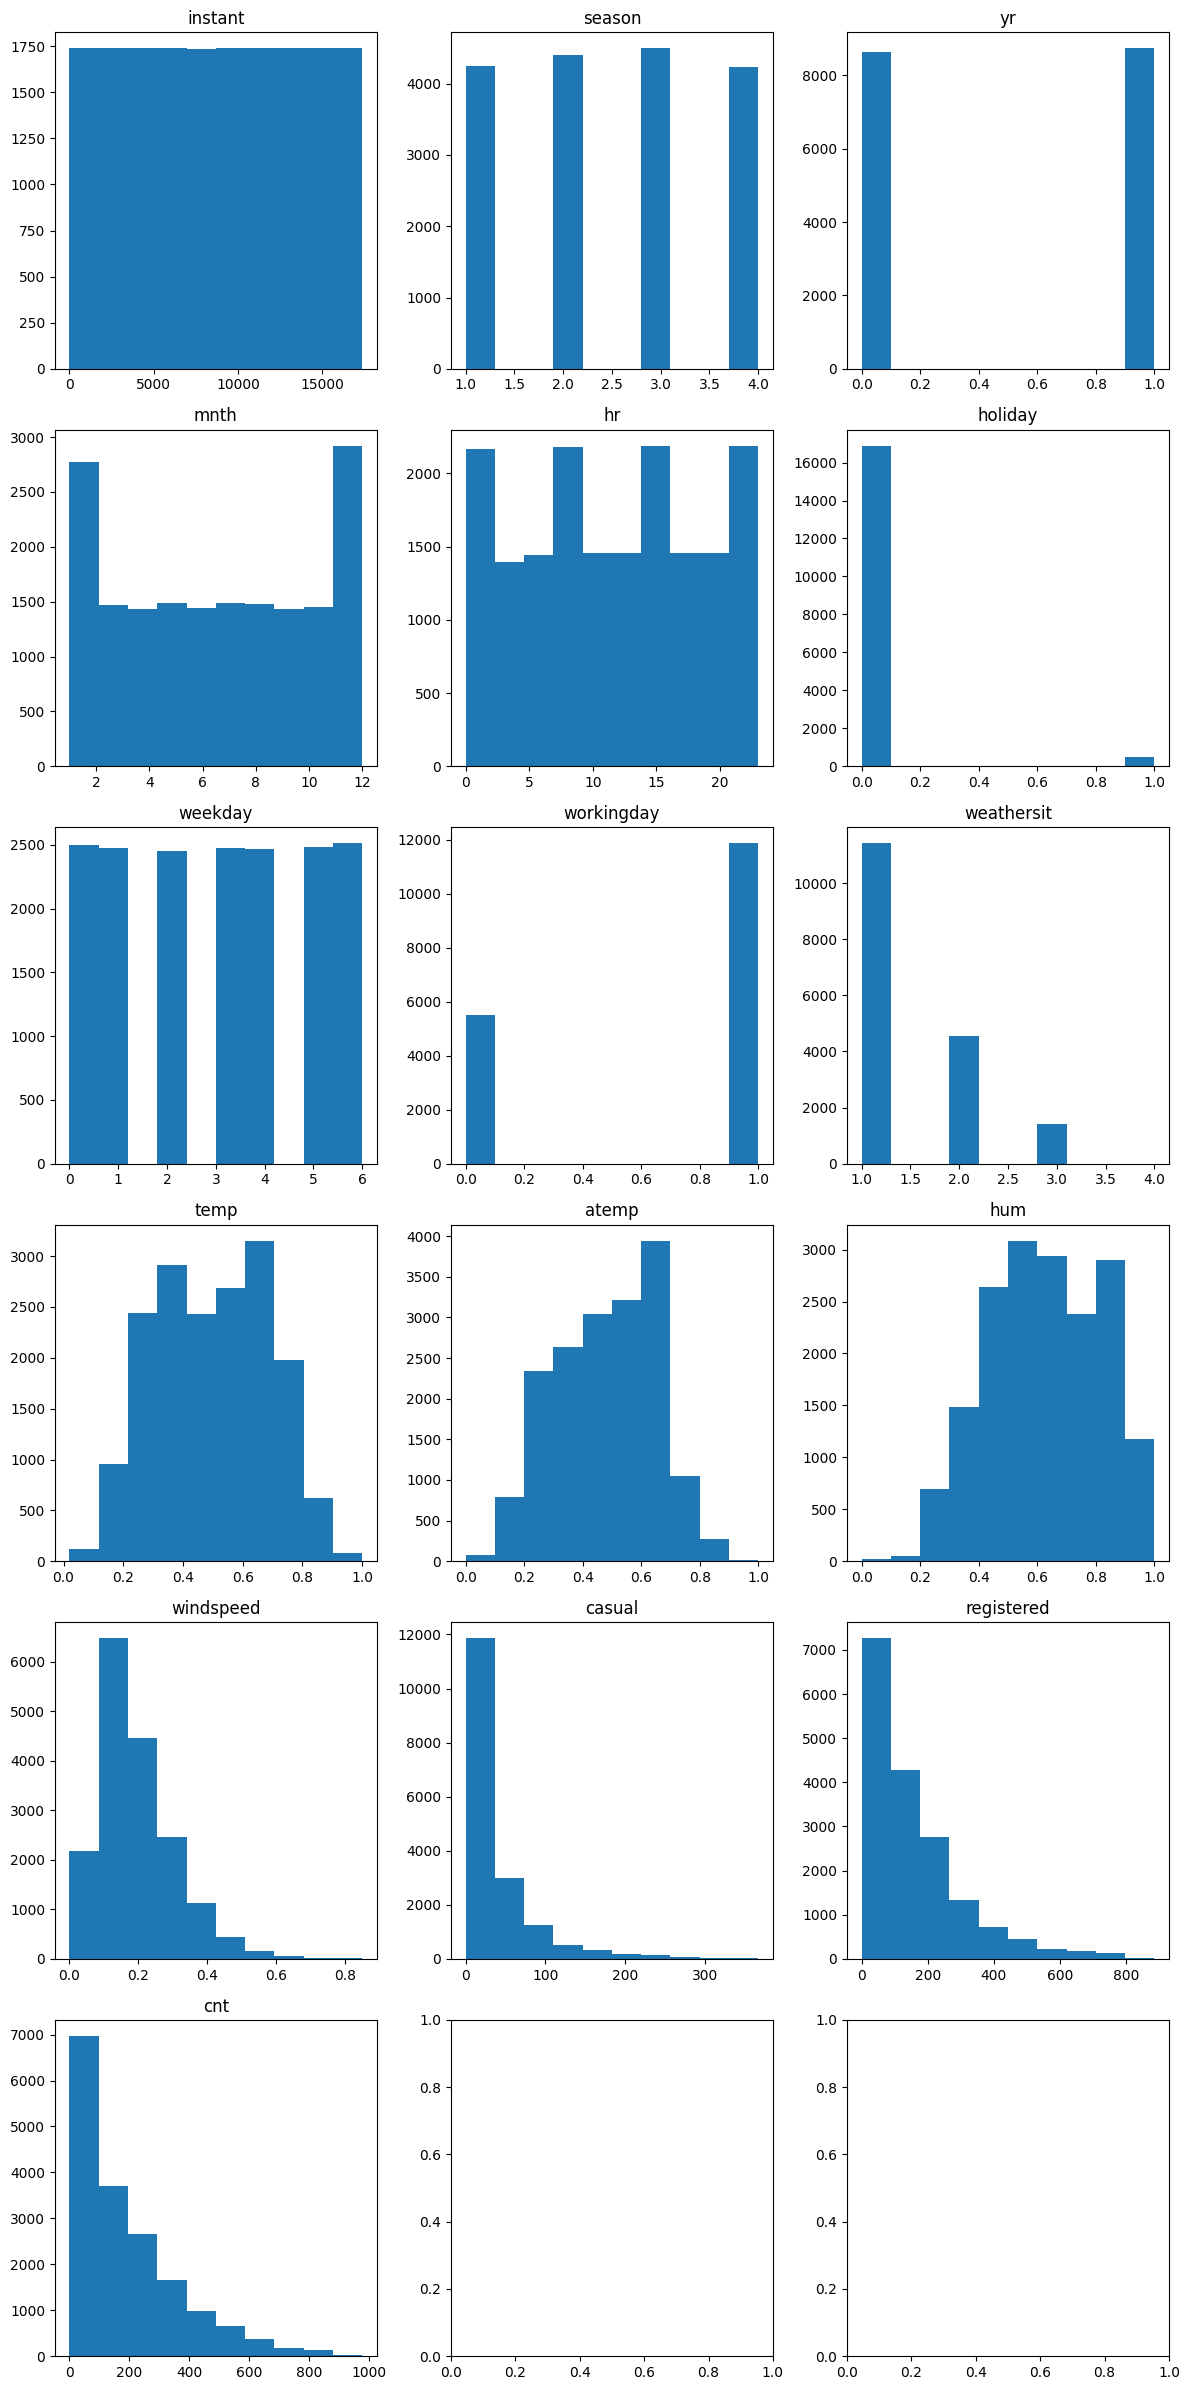

In [ ]:
numeric_columns = hour_df.select_dtypes(include=np.number).columns
num_cols = len(numeric_columns)
num_rows = (num_cols - 1) // 3 + 1  # Adjust the number of columns per row as needed
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i]
    ax.hist(hour_df[column])
    ax.set_title(column)
fig.tight_layout()
plt.show()

<ipython-input-43-fc32b3f7d35c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hour_df.corr()


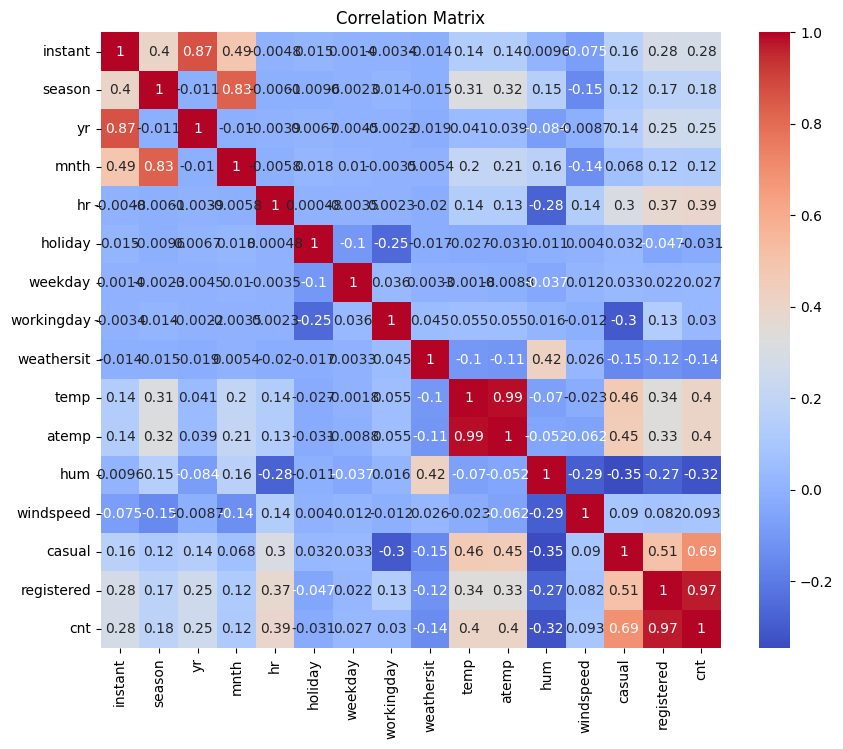

In [ ]:
corr_matrix = hour_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

- Jumlah count of total rental bike berdasarkan season

In [ ]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=True).reset_index().head(30)

,hr,cnt
0,4,25
1,5,58
2,3,60
3,2,100
4,1,120
5,0,162
6,6,187
7,23,196
8,22,252
9,21,294


- Jumlah count of total rental bike berdasarkan season

In [ ]:
hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=True).reset_index().head(10)

,season,cnt
0,1,482
1,4,690
2,2,721
3,3,760


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa jumlah rental bike per bulan pada tahun 2011?

- Pivot tabel 2011

instant: record index

cnt: count of total rental bikes including both casual and registered

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
monthly_hour_2011_df = hour_df_2011.resample(rule='M', on='dteday').agg({
    "instant" : "nunique",
    "cnt": "sum"
})
monthly_hour_2011_df.index = monthly_hour_2011_df.index.strftime('%B')
monthly_hour_2011_df.head()

,instant,cnt
dteday,,
January,688,38189
February,649,48215
March,730,64045
April,719,94870
May,744,135821


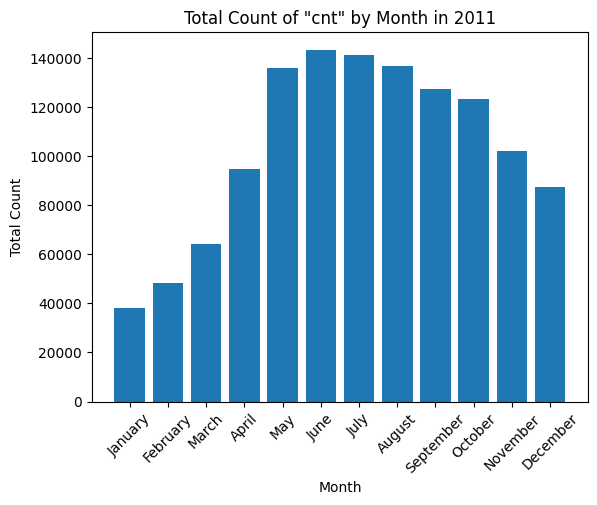

In [ ]:
plt.bar(monthly_hour_2011_df.index, monthly_hour_2011_df['cnt'])
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of "cnt" by Month in 2011')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh humidity terhadap jumlah rental bike?

In [ ]:
byhumidity_df = hour_df.groupby(by="hum").cnt.sum().reset_index()
byhumidity_df

,hum,cnt
0,0.00,623
1,0.08,77
2,0.10,107
3,0.12,29
4,0.13,17
...,...,...
84,0.93,21972
85,0.94,52601
86,0.96,375
87,0.97,64


In [ ]:
# Cari minimum 'cnt' value di byhumidity_df
min_cnt = byhumidity_df['cnt'].min()

# Filter the DataFrame for rows ketika 'cnt' == minimum value
min_cnt_rows = byhumidity_df[byhumidity_df['cnt'] == min_cnt]

# Nilai humidity ketika 'cnt' minimum
humidity_values = min_cnt_rows['hum'].values

print("Minimum 'cnt':", min_cnt)
print("Nilai humidity ketika 'cnt' minimum:", humidity_values)

Minimum 'cnt': 17
Nilai humidity ketika 'cnt' minimum: [0.13]


In [ ]:
# Cari maximum 'cnt' value di byhumidity_df
min_cnt = byhumidity_df['cnt'].max()

# Filter the DataFrame for rows ketika 'cnt' == maximum value
min_cnt_rows = byhumidity_df[byhumidity_df['cnt'] == min_cnt]

# Nilai humidity ketika 'cnt' maximum
humidity_values = min_cnt_rows['hum'].values

print("Maximum 'cnt':", min_cnt)
print("Nilai humidity ketika 'cnt' maximum:", humidity_values)

Maximum 'cnt': 93265
Nilai humidity ketika 'cnt' maximum: [0.83]


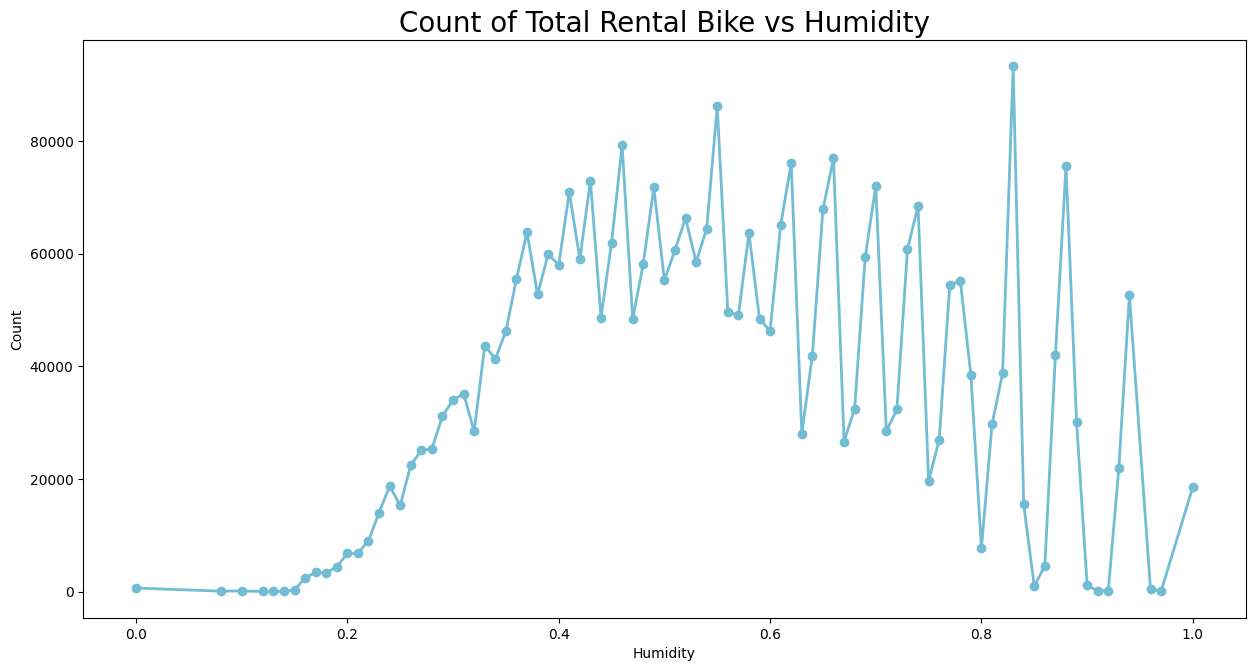

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.plot(
    byhumidity_df["hum"],
    byhumidity_df["cnt"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Count of Total Rental Bike vs Humidity', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Conclusion

- Conclution Pertanyaan 1:
Performa jumlah rental bike cenderung meningkat walaupun pada Bulan Juni sampai dengan Desember mengalami penurunan jumlah rental bike. Jumlah rental bike tertinggi terdapat pada Bulan Juni 2011 sedangkan jumlah rental bike terendah terdapat pada Bulan Januari 2011

- Conclution Pertanyaan 2:
Jumlah rental bike terbanyak terdapat ketika humidity sebesar 83% dengan jumlah rental sebanyak 93265 dan jumlah rental terendah terdapat ketika humidity sebesar 13% dengan jumlah rentak sebanyak 17 buah.